In [125]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import numpy as np

Accuracy : 88.0
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        97
           1       0.88      0.88      0.88       103

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



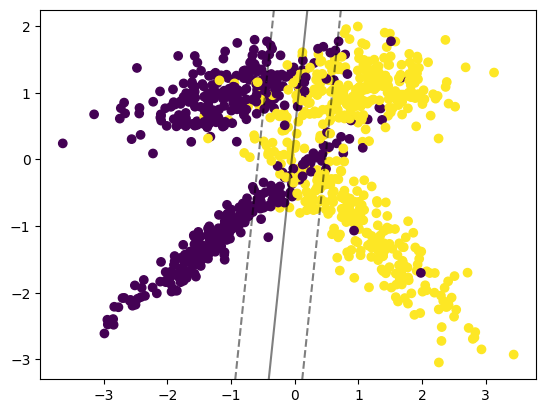

In [126]:
x,y = make_classification(n_samples = 1000,n_features=2,n_informative=2,n_redundant=0)
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

pred = clf.predict(x_test)
accuracy = accuracy_score(y_test,pred) * 100
report = classification_report(y_test,pred)
print(f"Accuracy : {accuracy}")
print(f"Classification Report : \n{report}")

plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx,yy = np.meshgrid(np.linspace(xlim[0],xlim[1],100),np.linspace(ylim[0],ylim[1],100))

z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contour(xx,yy,z,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
plt.show()